# Definition

## yield curve structure의 일반적인 움직임을 포착한다. 



### MP<sup>1)</sup> 이전 (1960~1997년): 
- 경제적 안정과 금융시장의 상대적인 안정성이 반영되는 시기

### MP1 (1998~2007년), 아시아 금융위기:
- 금융위기 전의 시기로, 금융시장의 불안정성이 증가하기 시작한 시기
- MP1 기간은 금융 시장에 대한 긴축적인 변동을 포함하고 있다. 
- 이 기간 동안 전반적으로 짧은 기간의 채권 수익률이 높아지는 "inverted" yield curve 구조가 발생할 가능성이 있다.
- 금리 인상에 대한 우려로 인해 단기 채권 수익률이 장기 채권 수익률보다 높아진다.
#### 1998 아시아 금융위기
##### 목적
- 연준은 글로벌 금융시장의 불안정성 완화를 위해 조치를 취했다. 
- 아시아 금융위기로 인해 글로벌 경기에 악영향을 미치는 것을 막기 위해 금융시장의 안정을 유지하고자 했다.
##### 조치
- 금리 인하: 연준은 글로벌 금융시장의 불안정성 완화를 위해 기준금리를 인하하는 조치를 취했다.
- 스와프 협정: 연준은 아시아 국가들과의 통화 스와프 협정을 체결하여 외환 유동성을 지원했다.
- 구조 조정: 연준은 투자은행들에 대한 구조 조정을 허용하여 금융 시스템의 붕괴를 방지하고자 했다.
##### 문제점
- 아시아 금융위기는 동남아시아 국가들의 통화·금융위기로 발생하였으며, 환율하락, 자본유출, 금리 상승 등의 문제로 경제에 큰 충격을 주었다.

### MP2 (2008년~2019년), 서브프라임 금융위기:
- 금융위기와 코로나바이러스 팬데믹으로 인한 경제적 충격이 반영되는 시기
- MP2 기간은 금융 위기 이후의 경제 회복 및 정책 조율 기간으로 알려져 있다. 
- 이 기간 동안, 중앙은행의 정책 조작과 경제 예측에 따라 채권 수익률이 다양한 방향으로 움직이게 된다. 
- 금리 인하와 경제 회복에 따라 시장은 기울기가 급격히 상승하는 "steeper" 구조를 보일 수 있다. 
- 하지만, 경기 불확실성이나 위험 요인이 증가할 경우 플래트(flattening)하거나 인버티드한 yield curve 구조가 나타날 수도 있다.
#### 2008 서브프라임 금융위기
##### 목적
- 연준은 금융시스템 붕괴와 경제 침체를 피하기 위해 조치를 취했다. 
- 글로벌 금융위기의 확산을 막고 금융시장의 안정성을 유지하며 경기 회복을 지원하는 것이 주요 목표였다.
##### 조치
- 금리 인하: 연준은 경기 부양을 위해 기준금리를 역대 최저 수준까지 인하했다.
- 양적완화(QE): 연준은 대규모의 채권 매입을 통해 시장 유동성을 확대하고 장기금리를 낮추는 양적완화 정책을 시행했다.
- 구제금융: 연준은 금융기관에 대한 구조 조정과 구제금융을 제공하여 시스템적인 위험을 완화하려고 노력했다.
##### 문제점
- 2008 금융위기는 주로 서브프라임 모기지 위기로 인해 발생했다.
- 금융기관의 부실 자산 문제와 신용 시장의 동결 등이 발생하여 금융시스템에 심각한 위험을 야기했고, 이에 따른 금융시장의 충격과 경기 하락이 우려되었다.


### MP3 (2020년 이후), 코로나:
- 코로나바이러스 팬데믹 이후의 시기
- MP3는 주요 관심사이며, 2020년 이후 금융 시장의 변동성이 높아진 시기이다. 
- 이전 구간과 달리 MP3에서는 중앙 은행들이 금리 정책을 조정하는 동안 변동성이 높은 yield curve를 경험할 수 있다. 
- 전염병의 영향, 정책 변화 및 경제 회복에 따른 예측 불확실성 등이 요인으로 작용할 수 있다.
#### 2020 코로나
##### 목적
- 연준은 코로나바이러스 팬데믹으로 인한 경제와 금융시장의 위기 대응을 위해 조치를 취했다. 
- 경제 활동의 침체와 금융시장의 불안정성을 완화하고 경기 회복을 지원하는 것이 주요 목표였다.
##### 조치
- 금리 인하: 연준은 경기 부양과 금융시장 안정을 위해 금리를 급격하게 인하했다.
- 양적완화(QE): 연준은 대규모의 채권 매입을 통해 시장 유동성을 확대하는 양적완화 정책을 시행했다.
- 금융지원 정책: 연준은 중소기업 대출 프로그램 등의 금융 지원 정책을 추진하여 경제활동을 지원하고 금융시장의 안정성을 유지하려고 노력했다.
##### 문제점
- 코로나바이러스 팬데믹으로 인해 경제활동이 마비되고, 금융시장은 급격한 하락과 불안정성이 발생했다. 
- 생산과 소비의 감소, 신용 위험 증가 등이 경제에 부정적인 영향을 미치는 문제가 되었다.

1)Monetary Policy


## package 세팅 및 데이터 세팅

### 패키지

In [2]:
# !pip install quandl

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import quandl
from pandas_datareader import data as pdr
import pandas_datareader as web
from datetime import datetime

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 500)

### help function

In [5]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

In [6]:
def plot_PCA (dataset, start, end = None):

  if end is not None:
    dataset_test = dataset[start:end]

  else:
    dataset_test = dataset[start:]

  ## 스케일러
  scaler = StandardScaler().fit(dataset_test)
  dataset_sc = pd.DataFrame(scaler.fit_transform(dataset_test), columns = dataset_test.columns)
  ## PCA
  pca = PCA()
  PrincipalComponent=pca.fit(dataset_sc)  

  ## 누적 분산 보여주기
  NumEigenvalues=5
  idx = [f'PC{i}' for i in range(NumEigenvalues)]
  fig, axes = plt.subplots( figsize=(7,4))
  explained_variance_ratio = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues], index=idx)
  explained_variance_ratio.sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes)
  axes.set_xlim([0,1])
  # explained_variance_ratio.cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance')
  
  
  # # explained_variance
  # pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)

  ## pca 컴포넌트의 비중 보여주기
  

  weights = pd.DataFrame()

  for i in range(len(pca.components_)):
      weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

  weights = weights.values.T
  
  NumComponents=3    
          
  topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
  topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

  axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
  plt.subplots_adjust(hspace=0.35)
  axes[0].set_ylim(0, .2)
  plt.tight_layout()
  sns.despine()

  ##yield 커브 구조 보여주기

  fig, ax = plt.subplots(figsize=(8,5))
  pca_data = pd.DataFrame(pca.components_, 
                          index=[f'PC{i}' for i in range(pca.components_.shape[0])], 
                          columns=dataset.columns)

  pca_data.iloc[:3].T.plot(ax=ax)
  ax.set_xlabel("Principal Component")
  # plt.yticks([])
  plt.tight_layout()
  sns.despine()
  plt.show()

### 데이터 준비

#### Quanl 데이터

In [7]:
quandl.ApiConfig.api_key = "FKTM3JuTxzCy-6cgwWwt"

In [8]:
treasury_dict = {
    'DGS1MO': '1-month T-bill yield',
    'DGS3MO': '3-month T-bill yield',
    'DGS6MO': '6-month T-bill yield',
    'DGS1': '1-year T-note yield',
    'DGS2': '2-year T-note yield',
    'DGS3': '3-year T-note yield',
    'DGS5': '5-year T-note yield',
    'DGS7': '7-year T-note yield',
    'DGS10': '10-year T-bond yield',
    'DGS20': '20-year T-bond yield',
    'DGS30': '30-year T-bond yield'
}


quandlTreasuryKey = ["FRED/"+key for key in treasury_dict.keys()]
treasury_df = quandl.get(quandlTreasuryKey)

# 데이터셋 최적화
datasets = treasury_df.copy()
datasets.columns=[value for value in treasury_dict.values()]
datasets.reset_index(inplace=True)  # 인덱스 초기화
datasets.rename(columns={'Date': 'date'}, inplace=True)  # 'Date' 컬럼 이름을 'date'로 변경

#### pandas 데이터  데이터

In [9]:
# 마지막 날짜 확인
last_date = datasets['date'].max()
# 현재 날짜 가져오기
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# 데이터 채워넣을 기간 설정
start_date = pd.to_datetime(last_date) + pd.DateOffset(days=1)
end_date = pd.to_datetime(today)
print(f"quandl 데이터의 마지막 일자는{last_date}입니다.")

if last_date != today:
    print(f"{start_date}부터 {end_date}의 데이터를 fred에서 채워 넣습니다")
    # 새로운 데이터 받아오기
    new_data = pdr.DataReader(list(treasury_dict.keys()), 'fred', start_date, end_date)
    new_data.columns = [value for value in treasury_dict.values()]
    new_data.reset_index(inplace=True)
    new_data.rename(columns={'DATE': 'date'}, inplace=True)  # 'Date' 컬럼 이름을 'date'로 변경
    
    # 데이터셋에 채워넣기
    datasets = pd.concat([datasets, new_data], axis=0,  ignore_index=True)
    datasets.set_index('date', inplace=True)

quandl 데이터의 마지막 일자는2022-07-15 00:00:00입니다.
2022-07-16 00:00:00부터 2023-06-18 00:00:00의 데이터를 fred에서 채워 넣습니다


In [10]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15359 entries, 1962-01-02 to 2023-06-15
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1-month T-bill yield  5472 non-null   float64
 1   3-month T-bill yield  10448 non-null  float64
 2   6-month T-bill yield  10448 non-null  float64
 3   1-year T-note yield   15350 non-null  float64
 4   2-year T-note yield   11758 non-null  float64
 5   3-year T-note yield   15350 non-null  float64
 6   5-year T-note yield   15350 non-null  float64
 7   7-year T-note yield   13480 non-null  float64
 8   10-year T-bond yield  15350 non-null  float64
 9   20-year T-bond yield  13661 non-null  float64
 10  30-year T-bond yield  11580 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [11]:
datasets.describe()

,1-month T-bill yield,3-month T-bill yield,6-month T-bill yield,1-year T-note yield,2-year T-note yield,3-year T-note yield,5-year T-note yield,7-year T-note yield,10-year T-bond yield,20-year T-bond yield,30-year T-bond yield
count,5472.000000,10448.000000,10448.000000,15350.000000,11758.000000,15350.000000,15350.000000,13480.000000,15350.000000,13661.000000,11580.000000
mean,1.285556,3.765992,3.949859,4.899301,5.005520,5.298310,5.554051,5.897381,5.885087,5.914676,6.260992
std,1.529197,3.213577,3.323752,3.427726,3.768456,3.313858,3.184898,3.250696,2.983227,2.893745,3.044584
min,0.000000,0.000000,0.020000,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.060000,0.580000,0.900000,2.160000,1.580000,2.690000,3.120000,3.110000,3.840000,4.010000,3.740000
50%,0.760000,3.580000,3.805000,4.960000,4.770000,5.280000,5.480000,6.040000,5.660000,5.410000,5.720000
75%,1.980000,5.740000,5.960000,6.820000,7.370000,7.280000,7.490000,7.860000,7.640000,7.410000,8.220000
max,6.020000,17.010000,17.430000,17.310000,16.950000,16.590000,16.270000,16.050000,15.840000,15.780000,15.210000


In [12]:
# dataset = datasets['1998':].iloc[:,1:]
# print(dataset['1998':].isna().sum(0))
dataset = datasets.iloc[:,1:].dropna()
dataset = datasets
# print(dataset['1998':].isna().sum(0))

# 금리 기간 구조 분석

## 금리 기간 구조 패턴
### 플랫트닝 (Flattening):
- 플랫닝은 금리 기간 구조에서 단기와 장기 금리 간의 차이가 줄어드는 형태를 말한다. 즉, 일반적으로 단기 금리가 상승하거나 장기 금리가 하락하여 금리 곡선이 평평해지는 경향을 보인다. 이는 시장 예상이 불확실하거나 경제의 불안정한 신호로 해석될 수 있다.

### 스테핑 (Steepening):
- 스테핑은 금리 기간 구조에서 단기와 장기 금리 간의 차이가 증가하는 형태를 말한다. 즉, 일반적으로 단기 금리가 하락하거나 장기 금리가 상승하여 금리 곡선이 가파르게 되는 경향을 보인다. 이는 경기 회복이나 인플레이션 압력 증가 등 경제적인 호전 신호로 해석될 수 있다.
- 리버스 되는 경우에는 경기 침체를 생각할 수도 있다.

#### 트위스트 (Twisting):
- 트위스트는 금리 기간 구조에서 단기와 장기 금리 간의 차이가 변화하면서 곡선이 비대칭적으로 왜곡되는 형태를 말한다. 일반적으로 금리 곡선의 특정 부분에서 단기나 장기 금리의 움직임이 다른 부분에 비해 더 큰 변동성을 보이는 경우를 나타낸다. 이는 예기치 않은 경제적인 변화나 시장의 특정한 상황에 따라 발생할 수 있다.

#### 버터플라이 (Butterfly):
- 버터플라이는 금리 기간 구조에서 단기, 중기, 장기 금리 간의 상대적인 차이가 나타나는 형태를 말한다. 일반적으로 중기 금리가 상대적으로 높은 변동성을 보이며, 단기와 장기 금리 간의 차이가 중간 기간에서 가장 큰 경우를 나타낸다. 이는 시장의 예상이 불확실하거나 특정한 이벤트에 대한 경계로 해석될 수 있다.

## MP 이전의 금리 기간 구조

### Plot & Correlation

- 3개의 그룹으로 나뉘고 대체로 비슷한 움직임을 가진다.

- ~ 6개월, 1년, 2~30년

In [16]:
data=dataset[:"1997"]
data = data.dropna(axis=1, thresh=1).dropna()

데이터의 시작 일: 1981-09-01
데이터의 마지막 일: 1997-12-31


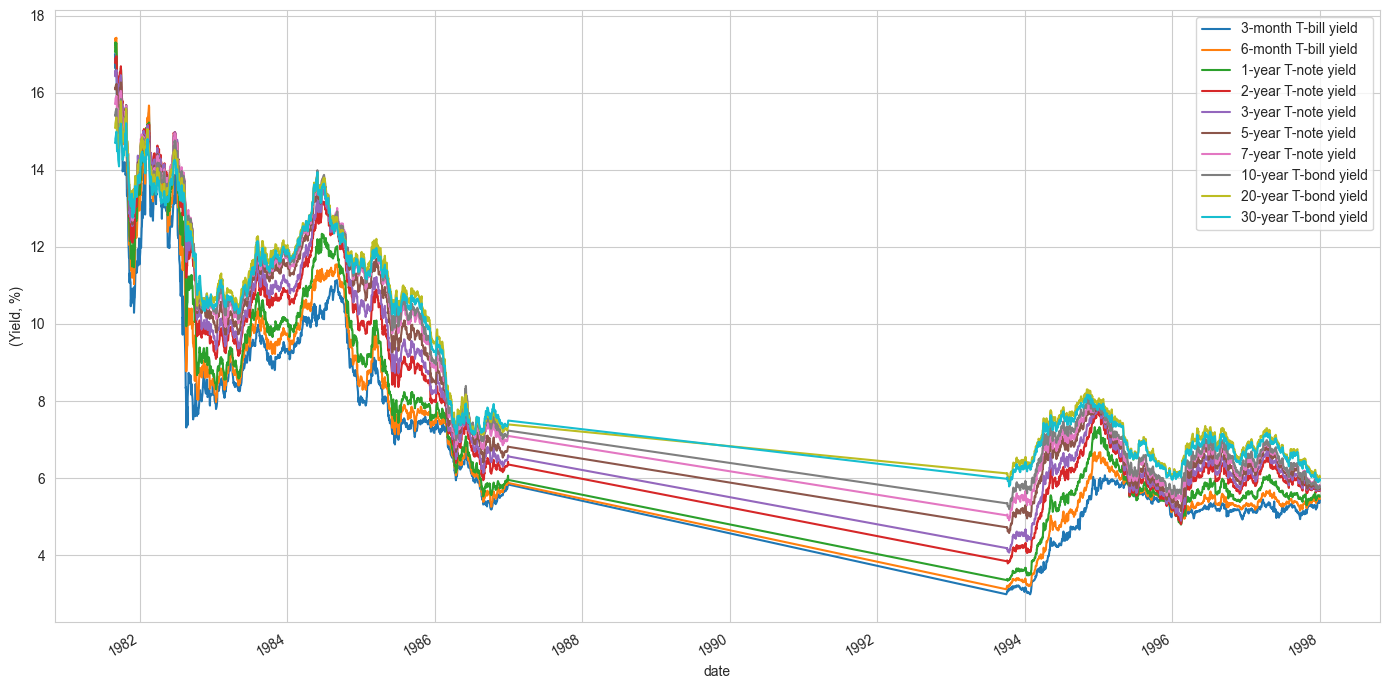

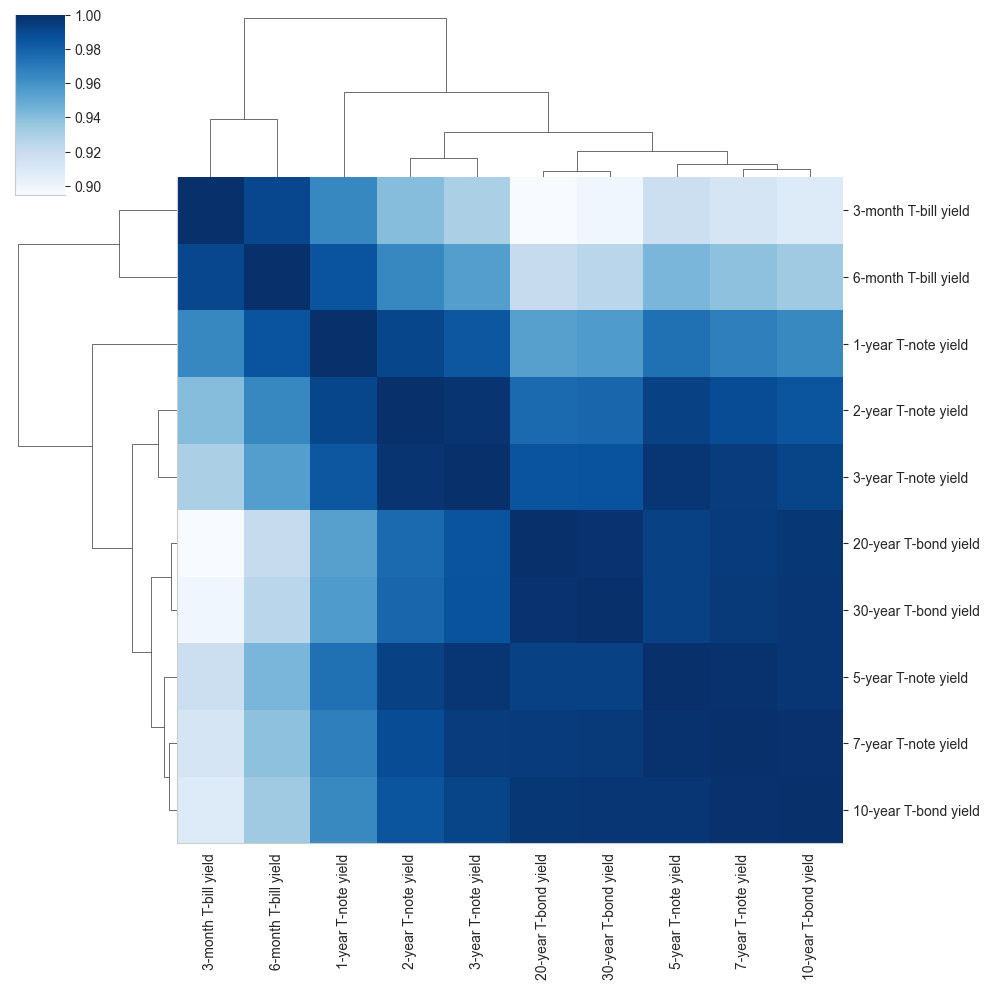

In [17]:
data.plot(figsize=(14,7))
plt.ylabel('(Yield, %)')
plt.tight_layout();

print(f"데이터의 시작 일: {data.index[0].strftime('%Y-%m-%d')}")
print(f"데이터의 마지막 일: {data.index[-1].strftime('%Y-%m-%d')}")
sns.clustermap(data.corr(method='spearman'), cmap='Blues')
sns.despine()

### With PCA
- Flattening
- PC0: 시장을 대부분 설명한다. 단기부터 장기까지 균일한 상관 관계를 가지고 있고 Flattening한 기간 구조를 보일 것으로 생각된다.
- 금리 조정으로 시장을 강력하게 통제할 수 있을 것으로 보인다.
- PC1: 단기와 장기의 상관관계가 서로 반대이다. 단기 금리를 올리면 반대로 장기 금리가 내려 갈 수 있다는 것이다. 반대로 단기 금리가 낮으면 장기 금리가 높을 수 있다. Recession을생각하면 쉽게 이해가 될 것이다. 다만 PC1은 전체 변동에 영향이 적다.

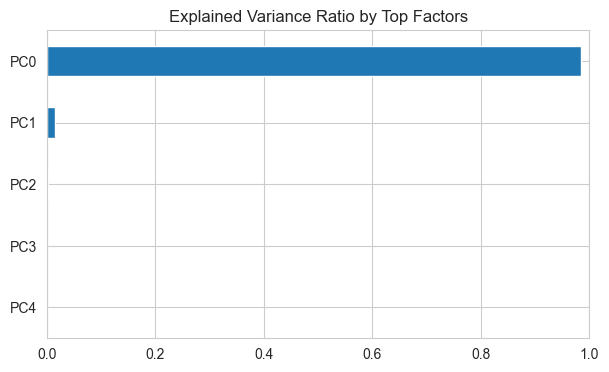

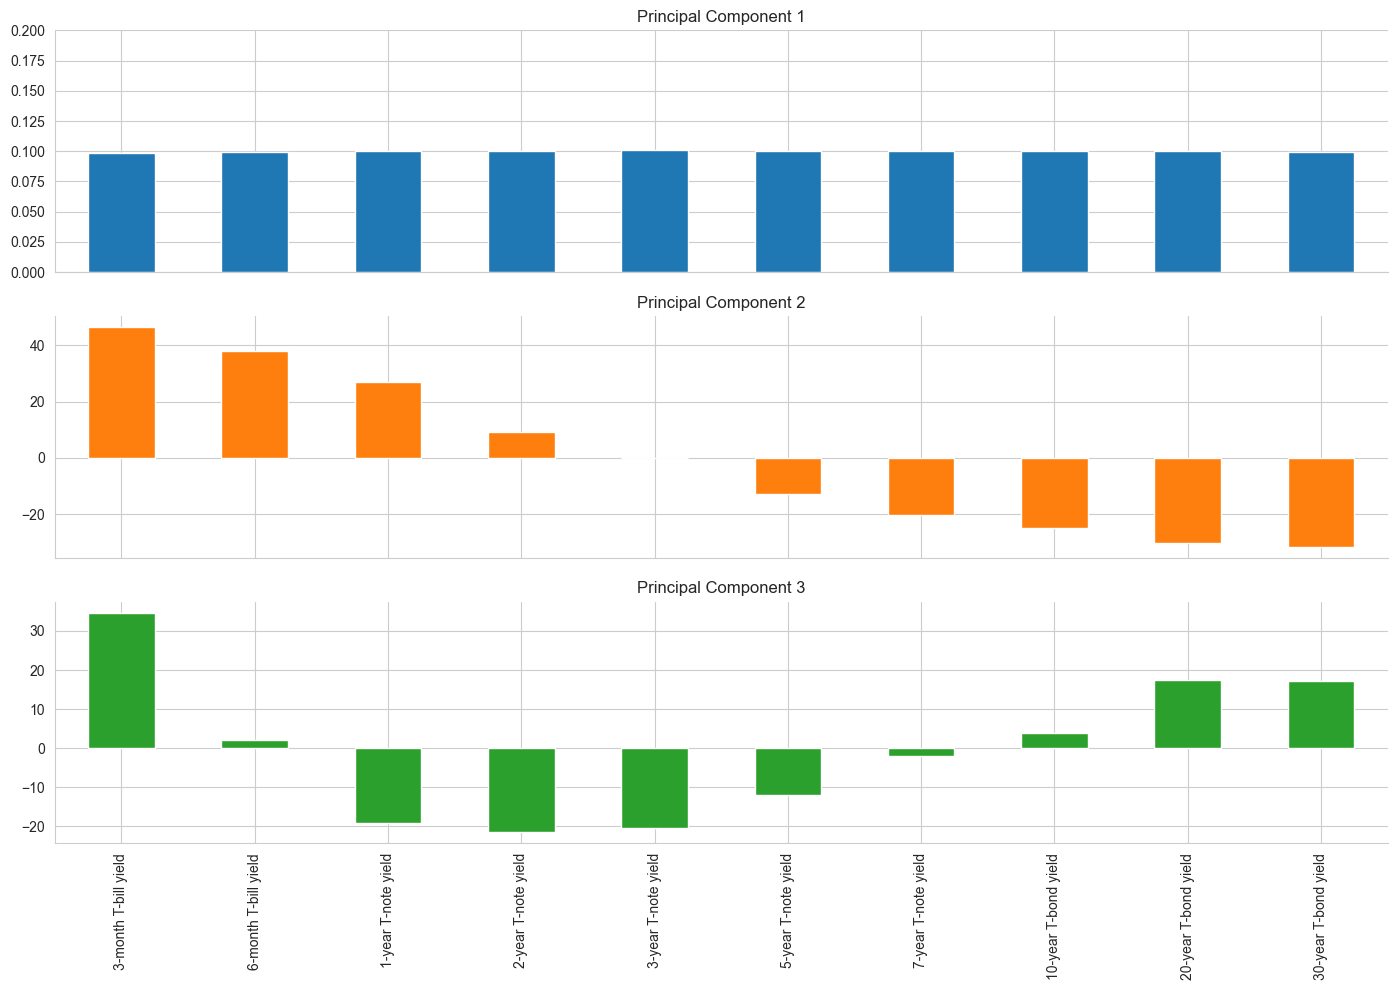

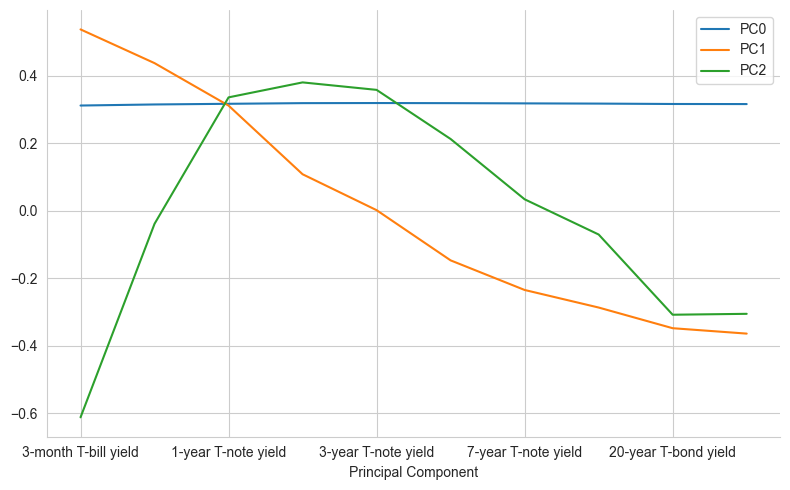

In [18]:
plot_PCA(data, start = '1981', end='1998')

## MP1: 1998~2008년

### Plot & Correlation

- 4개의 그룹으로 나뉘고 각 그룹이 별개로 움직이는 현상이 보인다.
- 통화 정책으로 장기 금리 조정이 어려워지는 것으로 보인다.

#### 금리 기간 구조
- 1개월, 6개월~3년, 5~10년, 20~30년

In [22]:
data = datasets['1998':'2008']
data = data.dropna(axis=1, thresh=1).dropna()

데이터의 시작 일: 2001-07-31
데이터의 마지막 일: 2008-12-31


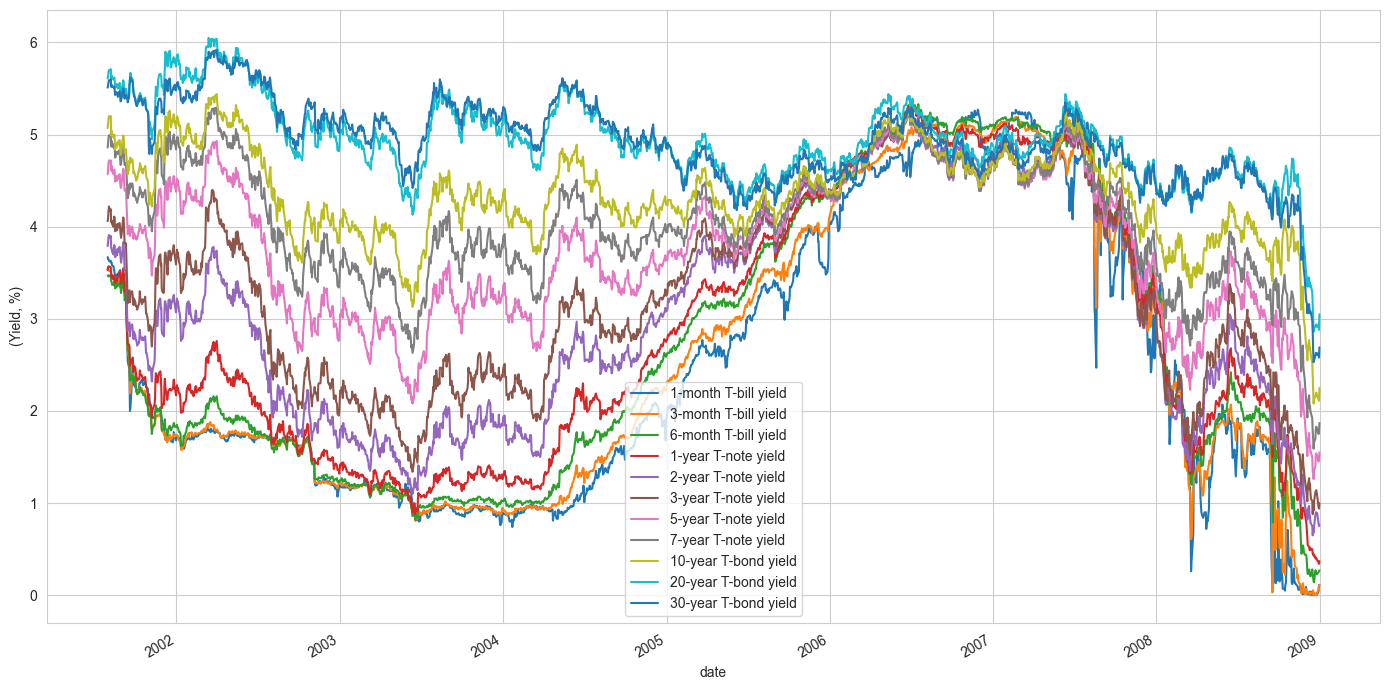

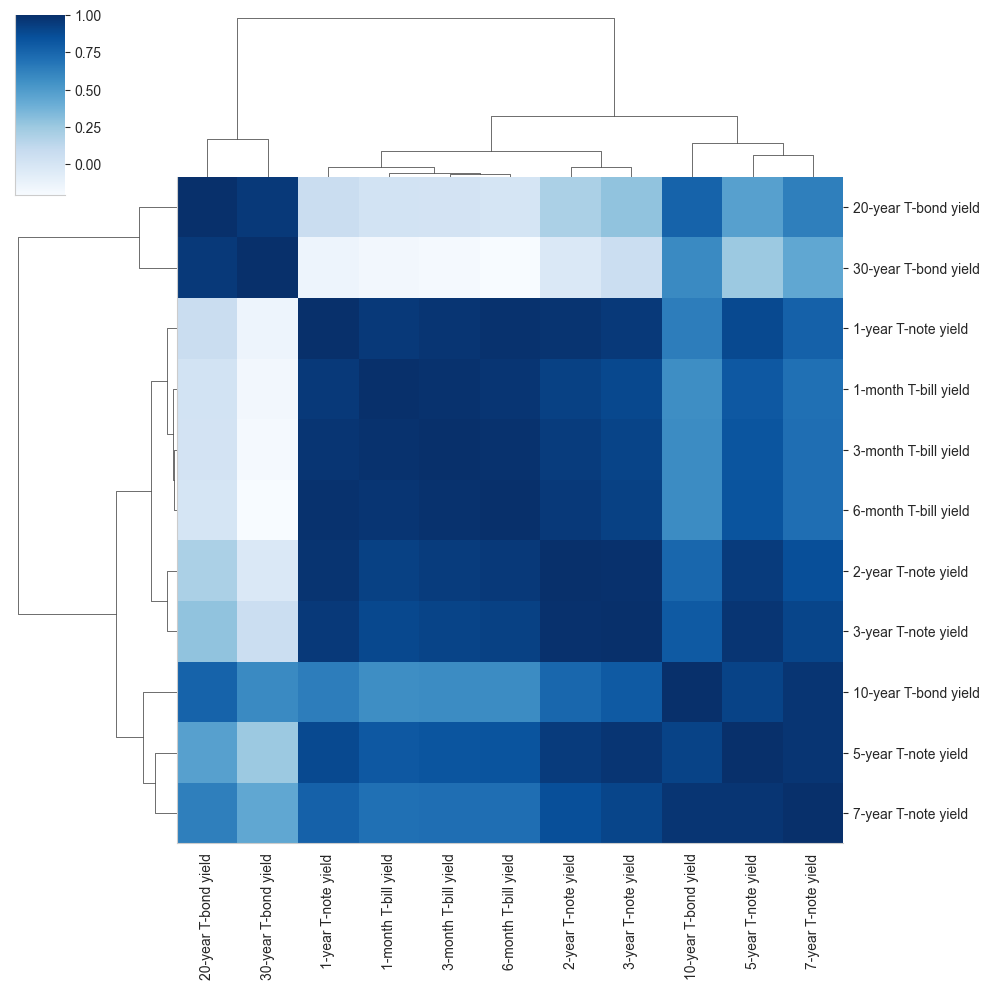

In [23]:
data.plot(figsize=(14,7))
plt.ylabel('(Yield, %)')
plt.tight_layout();

print(f"데이터의 시작 일: {data.index[0].strftime('%Y-%m-%d')}")
print(f"데이터의 마지막 일: {data.index[-1].strftime('%Y-%m-%d')}")
sns.clustermap(data.corr(method='spearman'), cmap='Blues')
sns.despine()

### With PCA
- Steepening
- 시장을 설명하는데 다양한 변수가 필요해졌다.
- PC0:장기 금리에 대한 설명력이 낮아 졌다. 즉, 금리 기간 구조는 Steepening으로 보이는 것으로 생각된다.
- PC1: MP1 이전보다 시장 설명력이 높아졌다. 특히 장기 금리와 관계가 높은 것으로 보이는데, 앞서 과거 금리 트렌트를 보아 이는 경기 침체에 대한 우려로 보인다.

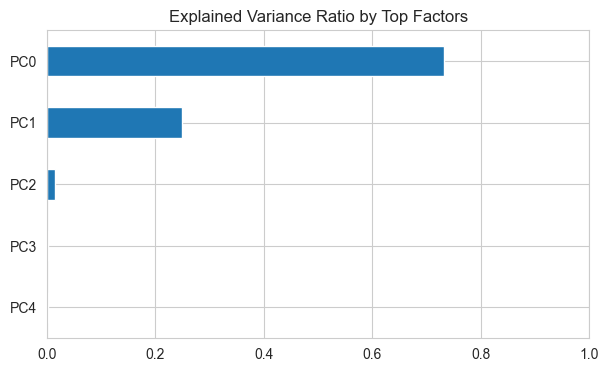

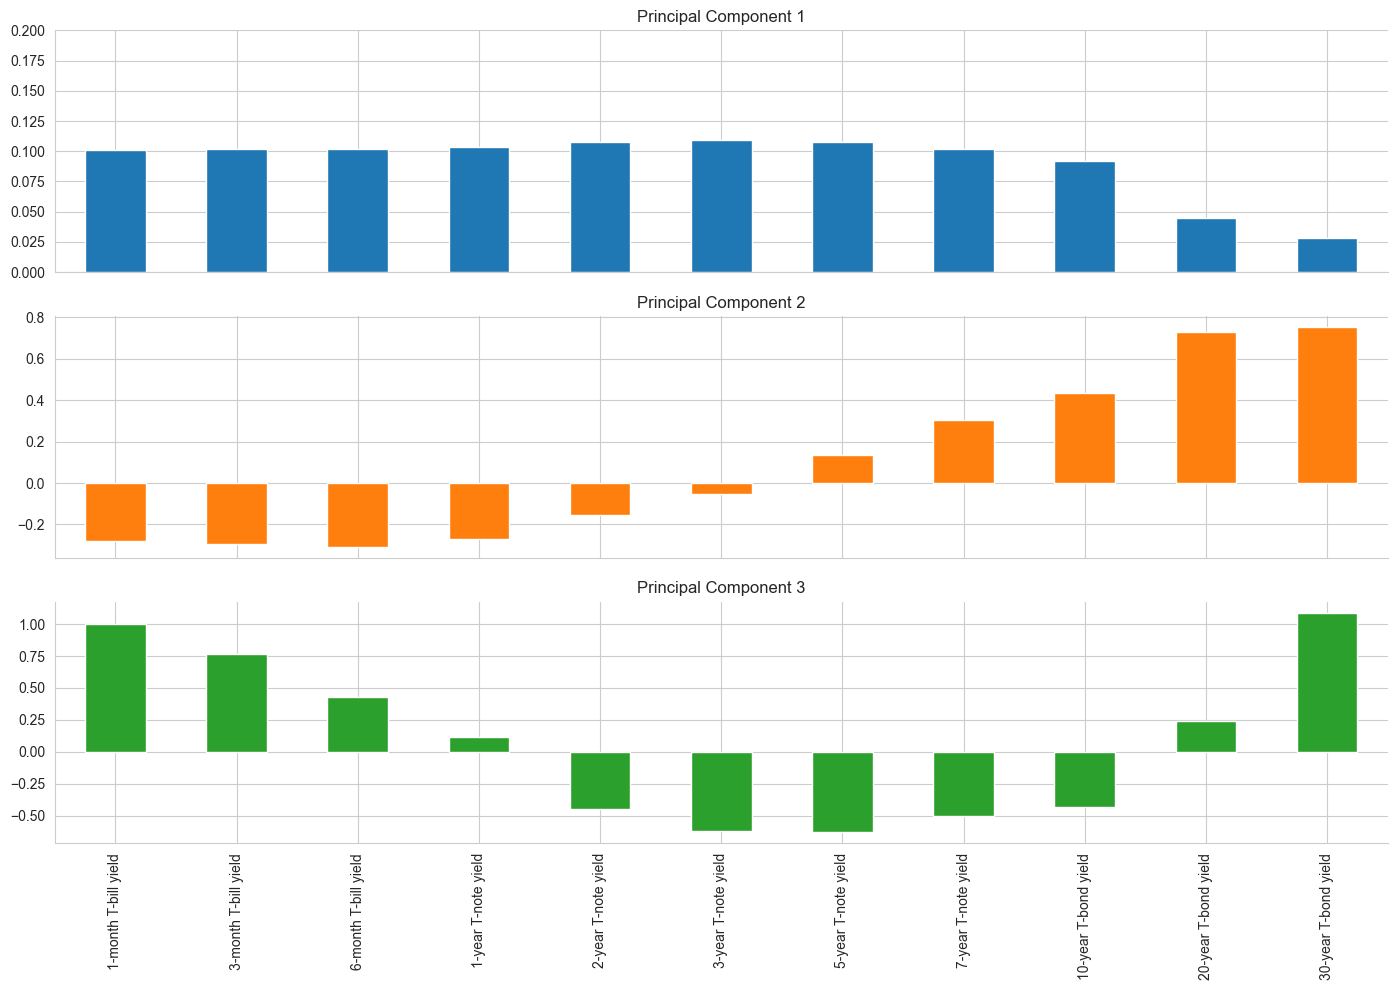

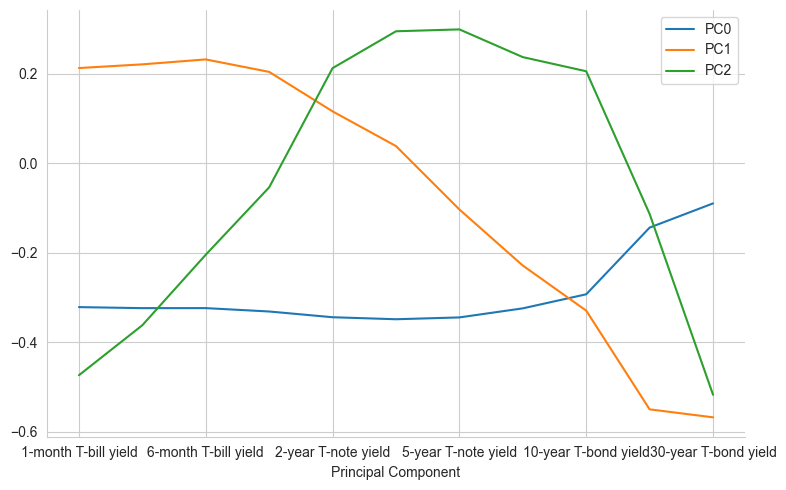

In [24]:
plot_PCA(data, start = '1998')

## MP2: 2009~2019년

### Plot & Correlation
- 6개의 그룹으로 나뉘고 각 그룹이 별개로 움직이는 현상이 보인다.
- 통화 정책으로 장기 금리 조정이 어려워지는 것으로 보인다.

#### 금리 기간 구조
- 1-3개월, 6개월-1년, 2-3년, 5년-7년, 10년, 20-30년

In [28]:
data = datasets['2009':'2019']
data = data.dropna(axis=1, thresh=1).dropna()

데이터의 시작 일: 2009-01-02
데이터의 마지막 일: 2019-12-31


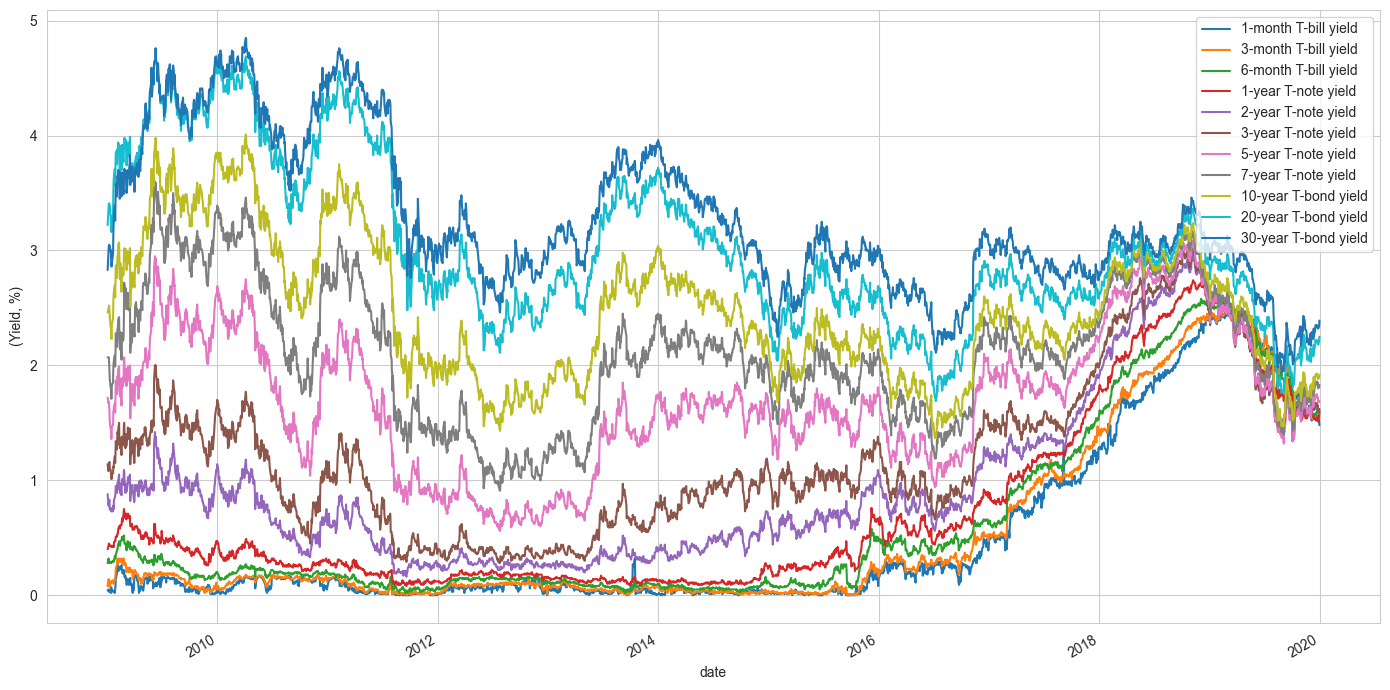

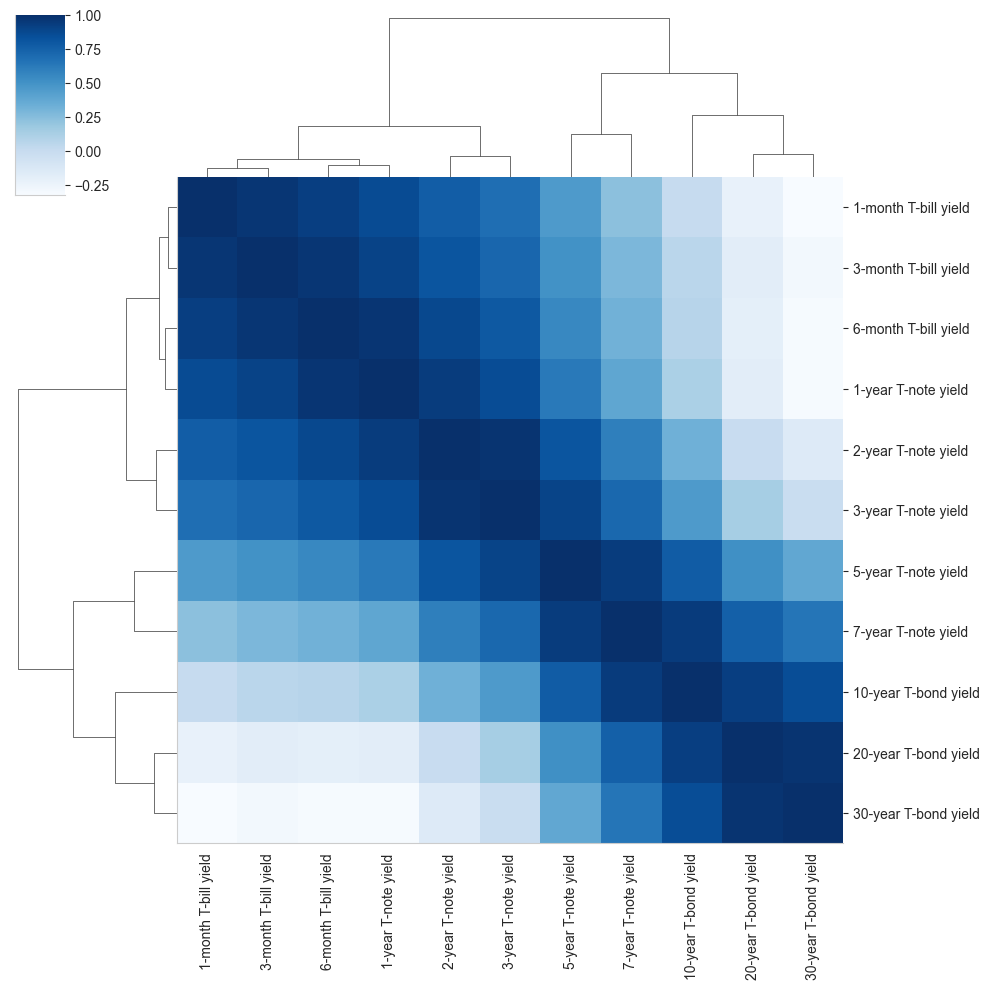

In [27]:
data.plot(figsize=(14,7))
plt.ylabel('(Yield, %)')
plt.tight_layout();

print(f"데이터의 시작 일: {data.index[0].strftime('%Y-%m-%d')}")
print(f"데이터의 마지막 일: {data.index[-1].strftime('%Y-%m-%d')}")
sns.clustermap(data.corr(method='spearman'), cmap='Blues')
sns.despine()

### With PCA
- Steepening
- MP1의 현상이 더욱 심화되는 것으로 보인다.
- PC0:장기 금리에 대한 설명력이 더욱 낮아 졌다. 즉, 금리 기간 구조는 Steepening이 더 심해지는 것으로 보인다.
- PC1: 장기 금리와 관계가 높은 것으로 보이는데, 앞서 과거 금리 트렌트를 보아 이는 경기 침체에 대한 우려로 보인다.

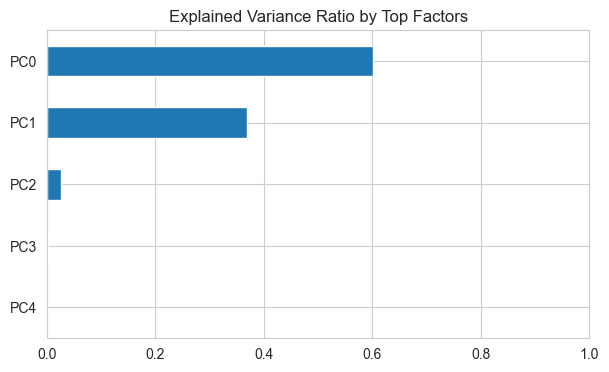

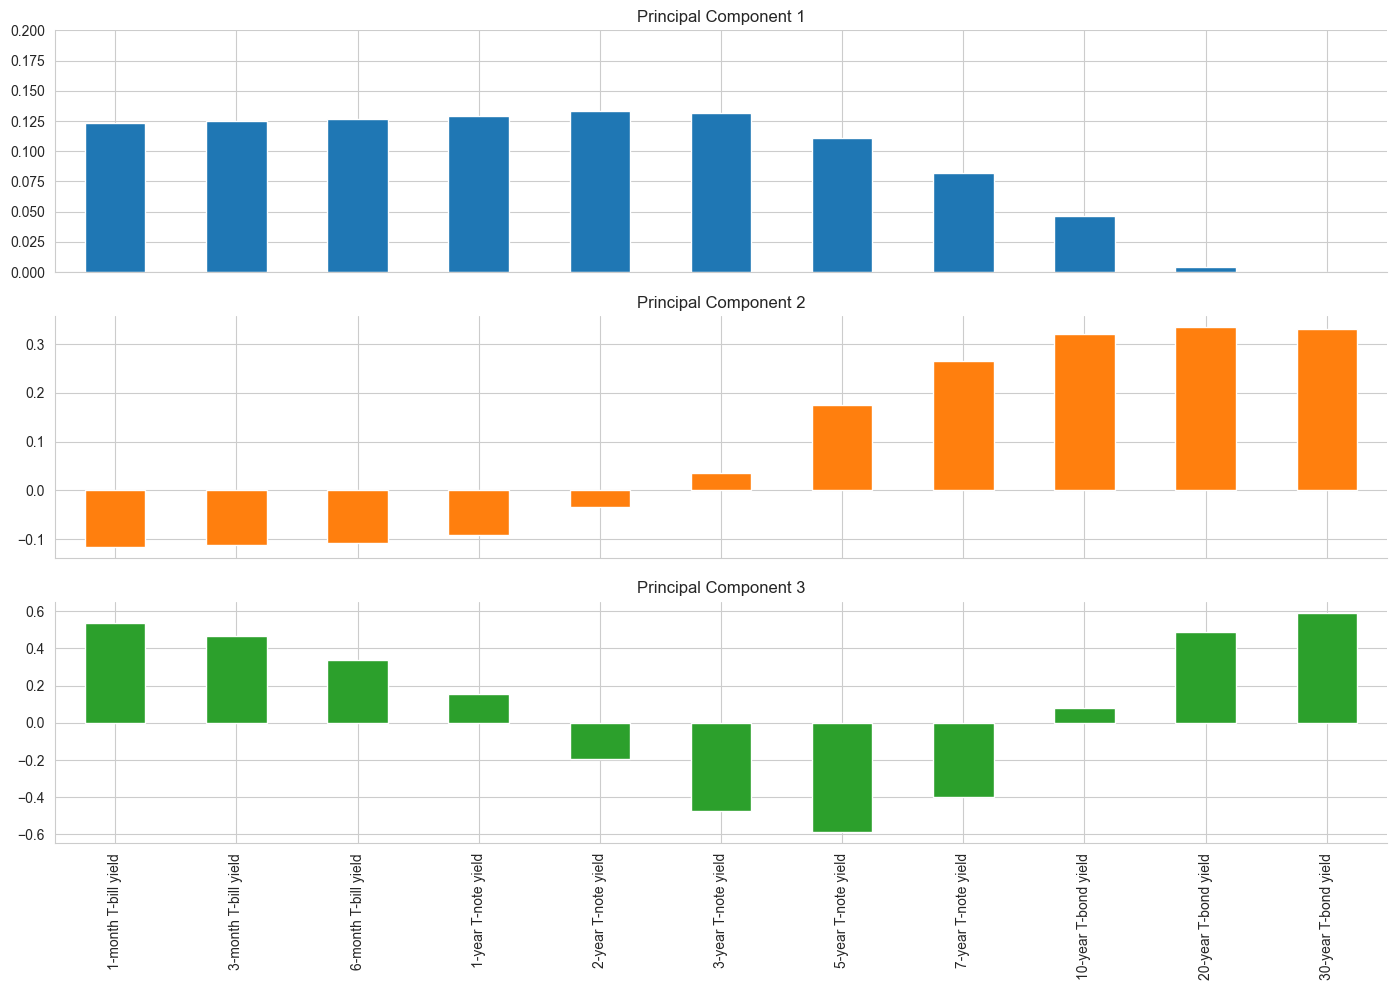

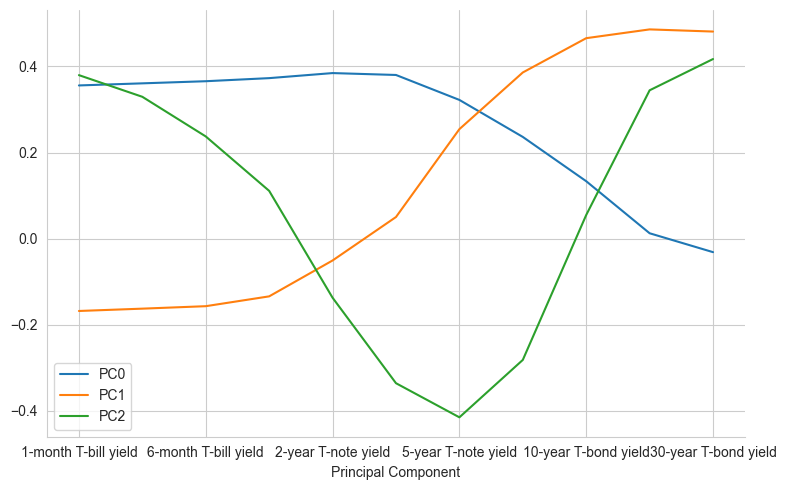

In [29]:
plot_PCA(data, start = '2009', end='2019')

## MP3: 2020년~

### Plot & Correlation
- 7개의 그룹으로 각 그룹이 별개로 움직이는 현상이 보인다.
- 금리 기간 구조가 파편화 되는 것으로 보인다.

#### 금리 기간 구조
- 1개월, 3-6개월, 1년, 2년, 3년, 5-10년, 20~30년

In [30]:
data = datasets['2020':]
data = data.dropna(axis=1, thresh=1).dropna()

데이터의 시작 일: 2020-01-02
데이터의 마지막 일: 2023-06-15


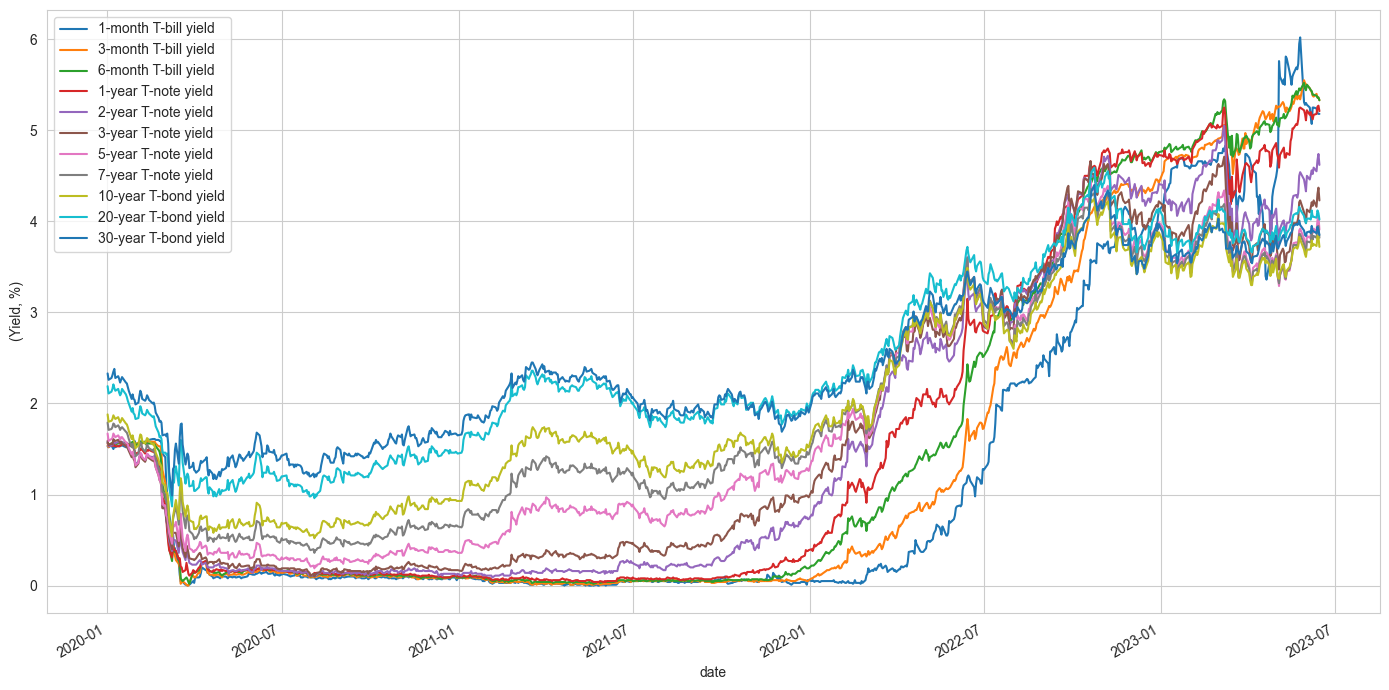

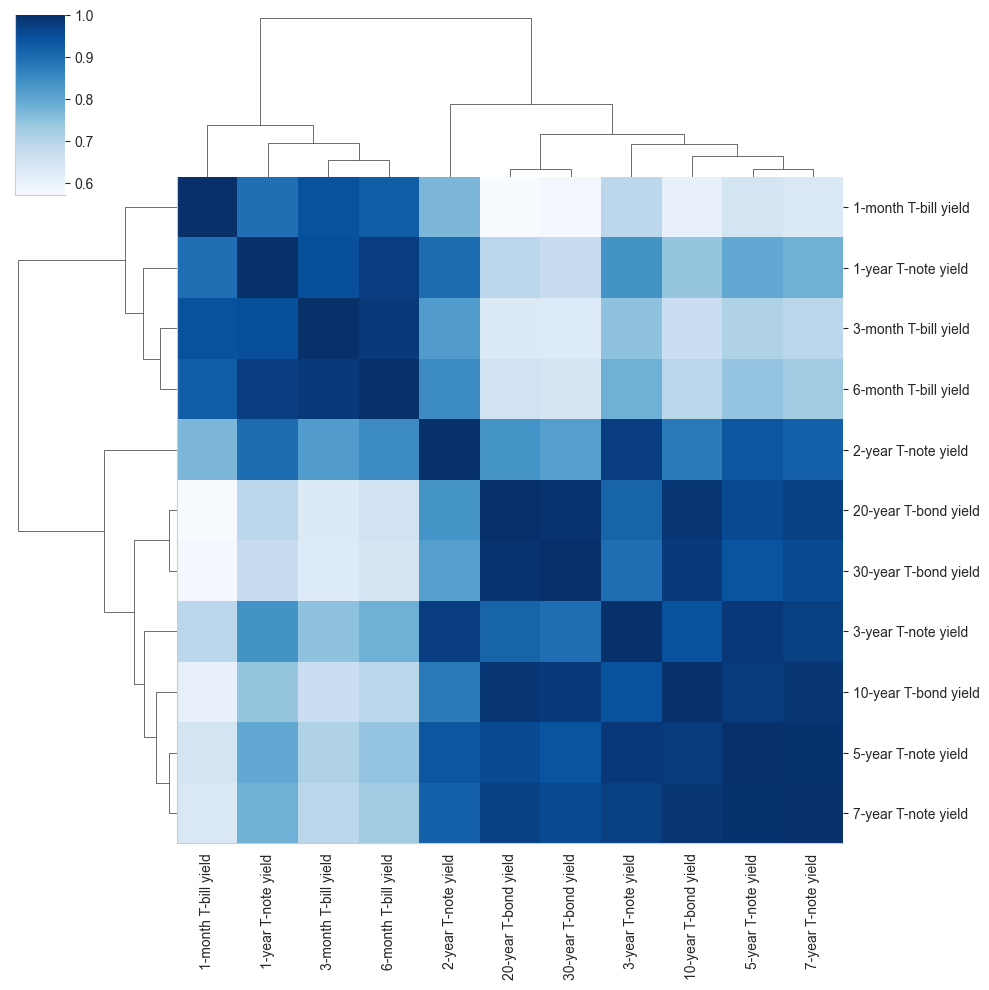

In [31]:
data.plot(figsize=(14,7))
plt.ylabel('(Yield, %)')
plt.tight_layout();

print(f"데이터의 시작 일: {data.index[0].strftime('%Y-%m-%d')}")
print(f"데이터의 마지막 일: {data.index[-1].strftime('%Y-%m-%d')}")
sns.clustermap(data.corr(method='spearman'), cmap='Blues')
sns.despine()

### With PCA
- Flattening
- PC0: 인플레이션으로 인해 모든 금리가 상승시켜 시장에 강하게 영향을 주는 시기이다. 모든 기간의 금리가 영향을 받고 있다.
- PC1: 통화 정책이 시행된지 얼마 되지 않아 단기 금리가 큰 영향을 받고 있다.

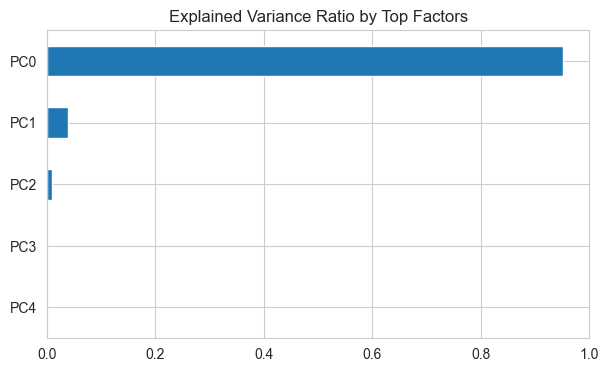

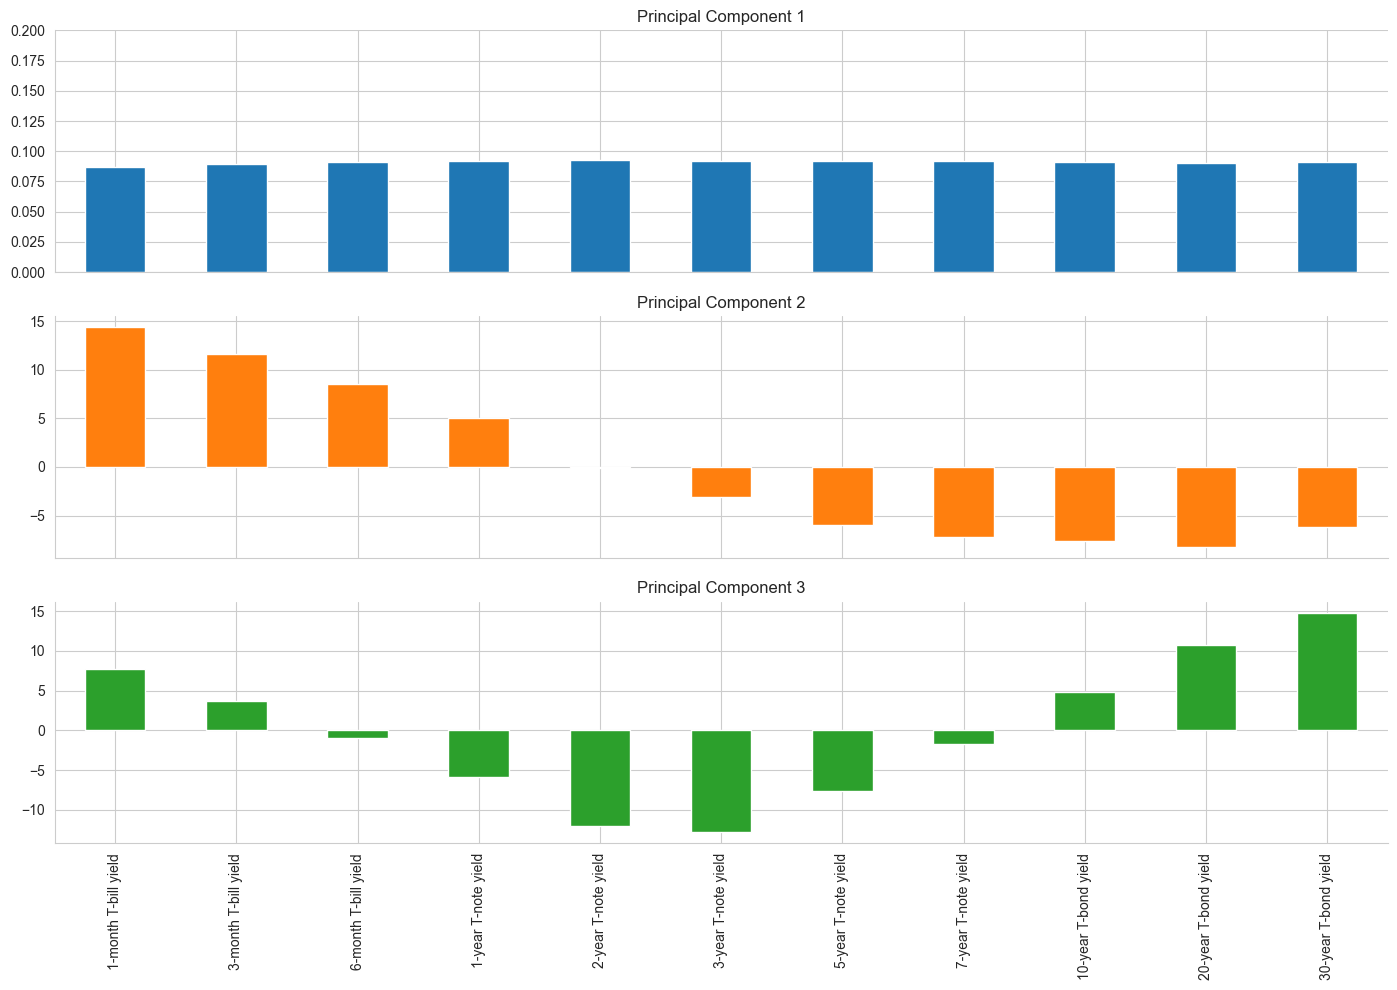

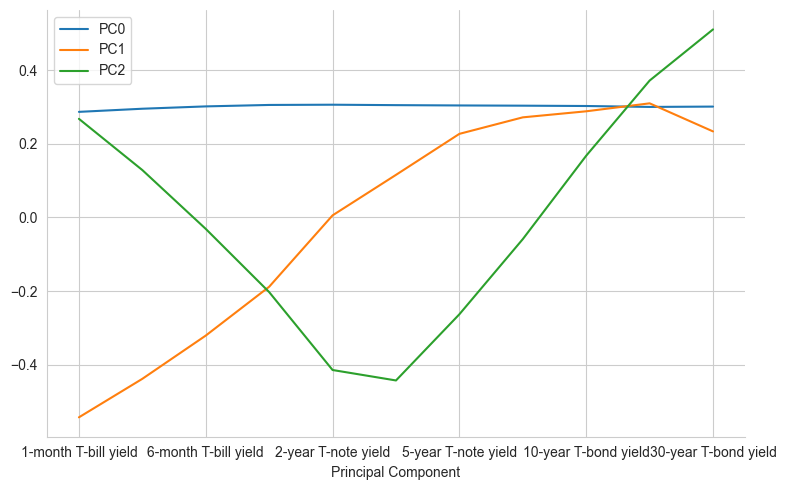

In [32]:
plot_PCA(data, start = '2020')

---

# 결론

- MP 이후 recession으로 인해 장기적으로 금리를 인하되는 심리가 점진적으로 증가되는 것으로 보인다.
- MP1, MP2, MP3를 지나면서 시장에 영향을 주는 요인이 다양해지는 것으로 보인다. PC1의 설명력이 점차 증가된다.
- MP3 이후도 MP1과 MP2와 유사한 흐름을 보일 것으로 생각되며, PC1의 영향도 증가될 것으로 생각된다.